In [28]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import random

# This is a table of Aack and Beep features
# ====================
# Aack | Beep
# 1    | 0
# 0    | 2
# ...
# 3    | 2
# --------------------
features = np.array([
    [1,0],
    [0,2],
    [1,1],
    [1,2],
    [1,3],
    [2,2],
    [2,3],
    [3,2],
])

# This labels Aack and Beep if they are sad or happy
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [30]:
# dot product is the sum of the products of the corresponding entries of the two sequences of numbers
# Example:
# weight = [1, 2]
# features = [3, 4]
# bias = 5
# | 1 | . | 3 |
# | 2 |   | 4 |
# 1 * 3 + 2 * 4 + 5 = 3 + 8 + 5 = 16
def score(weights, bias, features):
    return np.dot(features, weights) + bias

def step(score):
    return 1 if score > 0 else 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))
    
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error / len(features)

def perceptron_update_weights_and_bias(weights, bias, features, label, learning_rate):
    pred = prediction(weights, bias, features)
    
    # For each weight, update slightly
    # w1' = w1 + (label - pred) * X1 * learning_rate
    # w2' = w2 + (label - pred) * X2 * learning_rate
    for i in range(len(weights)):
        weights[i] += (label - pred) * features[i] * learning_rate
    bias += (label - pred) * learning_rate
    return weights, bias

def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    # The features[0] just means getting the data per row
    # remember the features input looked like this
    # features = np.array(
    # [1,0], --> this features[0]
    # So we have len([1,0]) = 2
    # 2 weights
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0

    # tracking the errors per epoch
    errors = [] 

    for epoch in range(epochs):
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        random_index = random.randint(0, len(features) - 1)
        random_features = features[random_index] # X1, X2
        random_label = labels[random_index] # labeled or actual data
        weights, bias = perceptron_update_weights_and_bias(weights, bias, random_features, random_label, learning_rate)
    
    return weights, bias, errors

    
weights, bias, errors = perceptron_algorithm(features, labels)

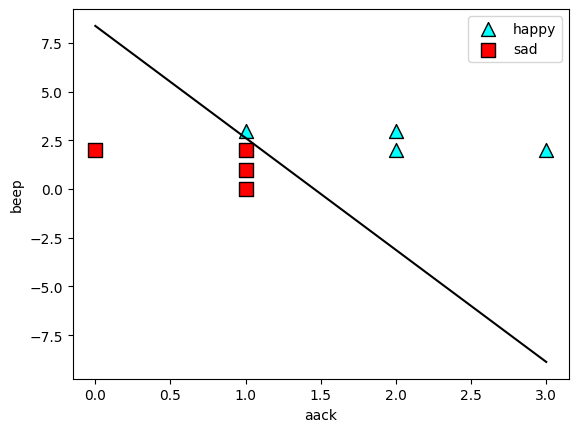

In [31]:
import matplotlib.pyplot as plt

def draw_equation(weights, bias):
    x = np.linspace(0, 3, 1000)
    a = weights[0]
    b = weights[1]
    # Plotting 0 = a*x - b*y + bias
    # y = (-a * x / b) - bias / b
    # if a*x - b*y + bias = 0 means that means there is no classification given x and y
    # if a*x - b*y + bias > 0 means that the classification is in the positive side
    # if a*x - b*y + bias < 0 means that the classification is in the negative side
    #
    # | pos       - <--- ax - by + bias = 0
    # |        -
    # |     -
    # |  - 
    # |-________neg______
    
    plt.plot(x, (-a * x / b) - bias / b, linestyle='-', color='black')


def display_results(X, Y, labels=['happy', 'sad']):
    plt.xlabel('aack')
    plt.ylabel('beep')

    happy_indices = np.argwhere(Y==1)
    sad_indices = np.argwhere(Y==0)

    sadpoints = X[happy_indices]
    happypoints = X[sad_indices]

    plt.scatter(
        [point[0][0] for point in sadpoints],
        [point[0][1] for point in sadpoints],
        s=100,
        color='cyan',
        edgecolors='k',
        marker='^'
    )

    plt.scatter(
        [point[0][0] for point in happypoints],
        [point[0][1] for point in happypoints],
        s=100,
        color='red',
        edgecolors='k',
        marker='s'
    )
    plt.legend(labels)


def plot_errors(errors):
    plt.title("Plotting mean perceptron errors")
    plt.xlabel("Epochs")
    plt.ylabel("Mean perceptron error")
    plt.scatter(range(len(errors)), errors, color = "blue")


display_results(features, labels)
draw_equation(weights, bias)


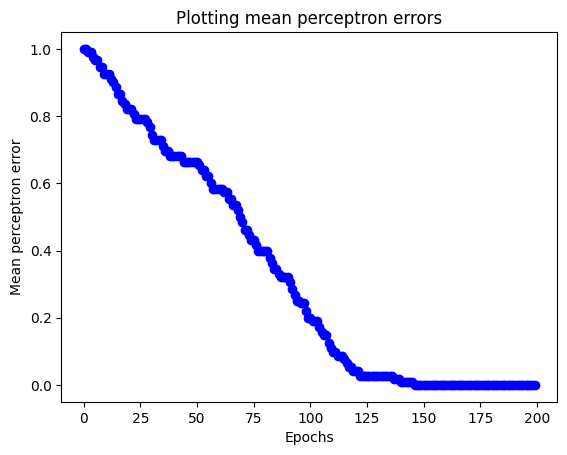

In [32]:
plot_errors(errors)

In [33]:
import turicreate as tc

datadict = {
    'aack': features[:,0],
    'beep': features[:,1],
    'prediction': labels
}
data = tc.SFrame(datadict)

perceptron = tc.logistic_classifier.create(data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.001041     | 1.000000          |

| 2         | 3        | 0.002250     | 1.000000          |

| 3         | 4        | 0.003670     | 1.000000          |

| 4         | 5        | 0.004809     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [34]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502


In [35]:
patient_features = np.array([
    # Cough, Fever, Difficulty breathing, Tiredness
    [0, 1, 1, 1],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])

patient_labels = np.array([
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1
])

weights, bias, errors = perceptron_algorithm(patient_features, patient_labels, learning_rate=0.01, epochs=2000)

weights: [-0.03000000000000075, -0.020000000000000753, -0.03000000000000075, -0.020000000000000753], bias: 0.07000000000000009
predictions: [0, 0, 0, 0, 1, 1, 1, 1]


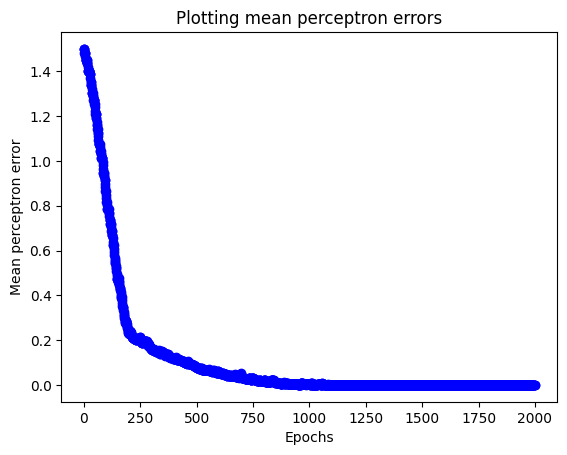

In [36]:
print(f'weights: {weights}, bias: {bias}')
plot_errors(errors)

predictions = [prediction(weights, bias, patient) for patient in patient_features]
print(f'predictions: {predictions}')

In [37]:
features = np.array([
    [1, 1]
])
labels = np.array([0])
initial_weights = [2, 3]
initial_bias = 4
initial_error = error(initial_weights, initial_bias, features, labels)
initial_prediction = prediction(initial_weights, initial_bias, features[0])


print(f'initial weights: {initial_weights}, initial bias: {initial_bias}')
print(f'error: {initial_error}, prediction: {initial_prediction}')

perceptron_update_weights_and_bias(initial_weights,
                                   initial_bias,
                                   features[0],
                                   labels[0], 0.01)
updated_error = error(initial_weights, initial_bias, features, labels)
updated_prediction = prediction(initial_weights, initial_bias, features[0])
print(f'updated weights: {initial_weights}, updated bias: {initial_bias}')
print(f'error: {updated_error}, prediction: {updated_prediction}')

initial weights: [2, 3], initial bias: 4
error: [9], prediction: 1
updated weights: [1.99, 2.99], updated bias: 4
error: [8.98], prediction: 1


and predictions: [0, 0, 0, 1]
or predictions: [0, 1, 1, 1]
xor predictions: [1, 0, 0, 0]


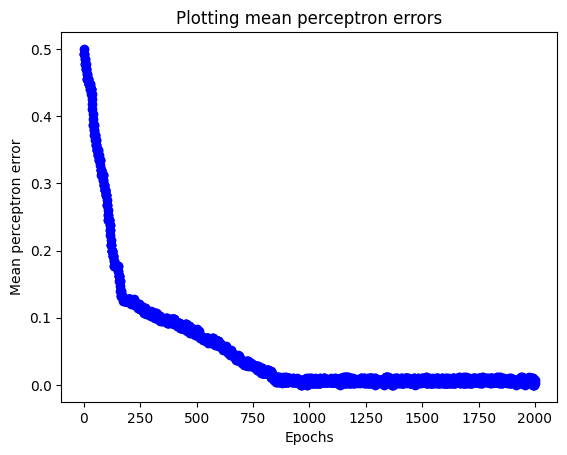

In [38]:
and_features = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
and_labels = np.array([0, 0, 0, 1])

and_weights, and_bias, and_errors = perceptron_algorithm(and_features, and_labels, learning_rate=0.01, epochs=2000)
and_predictions = [prediction(and_weights, and_bias, and_feature) for and_feature in and_features]
assert and_predictions == and_labels.tolist()
print(f'and predictions: {and_predictions}')

or_features = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
or_labels = np.array([0, 1, 1, 1])

or_weights, or_bias, or_errors = perceptron_algorithm(or_features, or_labels, learning_rate=0.01, epochs=2000)
or_predictions = [prediction(or_weights, or_bias, or_feature) for or_feature in or_features]
assert or_predictions == or_labels.tolist()
print(f'or predictions: {or_predictions}')

xor_features = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
xor_labels = np.array([0, 1, 1, 0])

xor_weights, xor_bias, xor_errors = perceptron_algorithm(xor_features, xor_labels, learning_rate=0.01, epochs=2000)
xor_predictions = [prediction(xor_weights, xor_bias, xor_feature) for xor_feature in xor_features]
print(f'xor predictions: {xor_predictions}')
plot_errors(xor_errors)


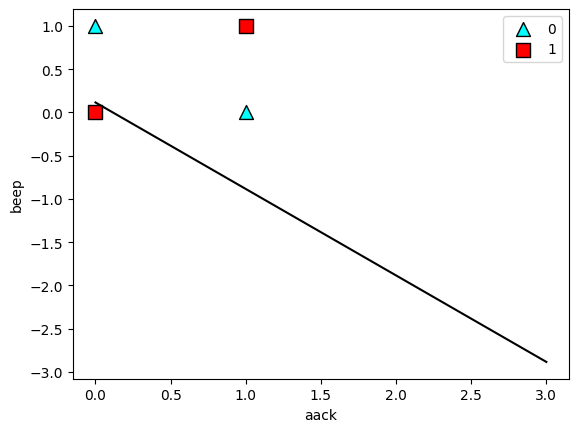

In [39]:
# It is impossible to create a perceptron that can classify XOR data

display_results(xor_features, xor_labels, labels=['0', '1'])
draw_equation(xor_weights, xor_bias)